# **Project Title:**
## **Indian Premier League (IPL)** – Data Analysis and Visualization of Winning Margins
### Using Frequency Distribution, Probability, and Normal Distribution Techniques

# **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

##  1. Take the **win_by_wickets** dataset 
##  2. Plot **frequency distribution** graph
#### On **X-axis** - Win by Wickets on **Y-axis** - Win by Wickets margin

In [4]:
df = pd.read_csv("C:\\Users\\Shashi yaduvanshi\\Downloads\\matches.csv")
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# 2. Relative frequency distribution graph using the same data set **win_by_wickets**
### **Task**:
#### Draw a relative frequency graph for the same win_by_wickets data.
### **Hint**: use normalize = True argument for pandas.Series.value_counts
#### Instead of showing frequency show percentage of values
### **Steps**:
#### Convert the frequency into relative frequency (i.e., proportion or percentage).
#### Plot the graph again:
#### X-axis: Win by Wickets
#### Y-axis: Percentage of matches
### **Purpose**:
#### This helps show the percentage share of each wicket margin instead of total numbers.

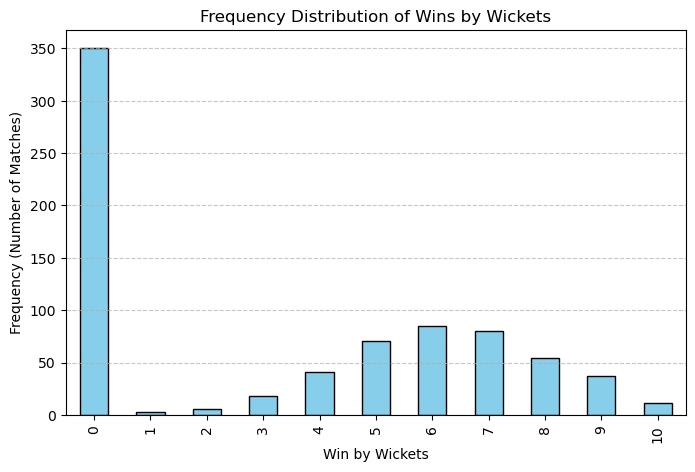

In [5]:
freq = df["win_by_wickets"].value_counts().sort_index()

plt.figure(figsize=(8,5))
freq.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Frequency Distribution of Wins by Wickets")
plt.xlabel("Win by Wickets")
plt.ylabel("Frequency (Number of Matches)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. **Cumulative Relative Frequency Graph**
### **Task:**
#### Create a cumulative relative frequency plot using the same data.
### **Steps:**
#### Start with the relative frequency data.
#### **Apply .cumsum()** to get the running total of percentages.
#### Plot the result as a line graph.
### **Purpose**:
#### This graph helps you understand how values accumulate —
#### for example, the total percentage of matches won by up to a certain number of wickets.

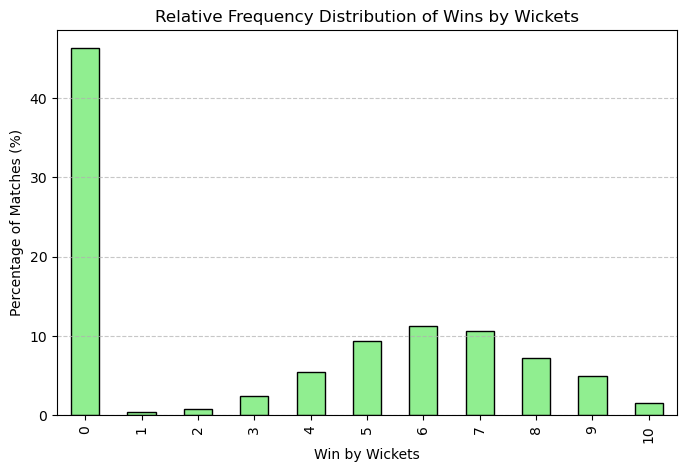

In [6]:
rel_freq = df["win_by_wickets"].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(8,5))
rel_freq.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Relative Frequency Distribution of Wins by Wickets")
plt.xlabel("Win by Wickets")
plt.ylabel("Percentage of Matches (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **4. Probability of Winning by 6 Wickets or Less**
### **Concept:**
#### Cumulative Relative Frequency gives the probability (×100) that a match had a certain value or less.
### **Steps:**
#### From the cumulative relative frequency graph, locate the value at x = 6 wickets.
### **Draw:**
#### A vertical line from 6 on the X-axis until it meets the curve.
#### A horizontal line from that point to the Y-axis.
#### The Y-axis value gives P(X ≤ 6) — i.e., the probability of winning by 6 wickets or fewer.
### **Formula:**
#### **𝑃(𝑋≤6)** = Cumulative Relative Frequency at 6

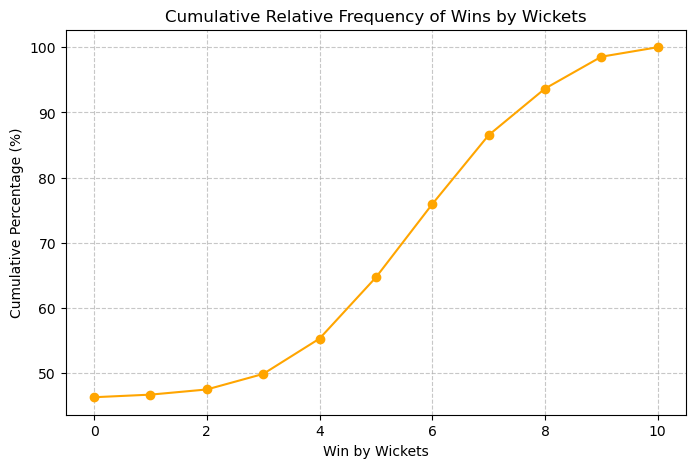

In [7]:
cum_rel_freq = rel_freq.cumsum()

plt.figure(figsize=(8,5))
plt.plot(cum_rel_freq.index, cum_rel_freq.values, marker='o', color='orange')
plt.title("Cumulative Relative Frequency of Wins by Wickets")
plt.xlabel("Win by Wickets")
plt.ylabel("Cumulative Percentage (%)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# **5: Normal Distribution for Win by Wickets**
### **Objective:**
#### To visualize how win_by_wickets follows a normal (bell-shaped) distribution.
### **Calculate:**
#### **Mean (μ)** = Average of win_by_wickets
#### Standard Deviation (σ) = Spread of values
### **Plot:**
#### A Histogram of win_by_wickets to show data distribution
#### A Line Graph (frequency curve) over the histogram
#### A Normal Distribution Curve using μ and σ for wickets 1–10
### **Purpose:**
#### This connects statistical concepts (mean, SD, normal distribution) with data visualization, showing whether results follow a normal pattern.

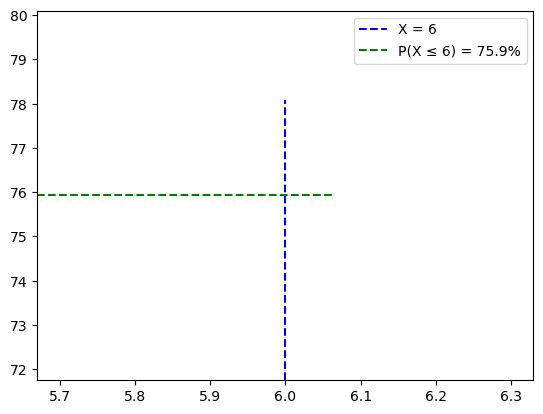

Probability of winning by 6 wickets or less = 75.9% or 0.76


In [8]:
x_val = 6
y_val = cum_rel_freq.loc[cum_rel_freq.index <= x_val].max()  # value at 6 or less

plt.axvline(x=x_val, ymax=y_val/100, color='blue', linestyle='--', label=f'X = {x_val}')
plt.axhline(y=y_val, xmax=x_val/10, color='green', linestyle='--', label=f'P(X ≤ {x_val}) = {y_val:.1f}%')

plt.legend()
plt.show()

print(f"Probability of winning by 6 wickets or less = {y_val:.1f}% or {y_val/100:.2f}")

# **6: Z-Score for 35 Runs** (Win by Runs Data)
### **Dataset:**
#### Use win_by_runs instead of wickets.
### **Formula:**
#### **𝑍** =𝑋−𝜇𝜎Z=σX−μ
### **Where:**
#### **X** = observed value (35 runs)
#### **μ** = mean of win_by_runs
#### **σ** = standard deviation of win_by_runs
### **Interpretation:**
#### The Z-score shows how far (in standard deviations) 35 runs is from the average winning margin.

Mean of win_by_wickets: 3.35
Standard Deviation of win_by_wickets: 3.39


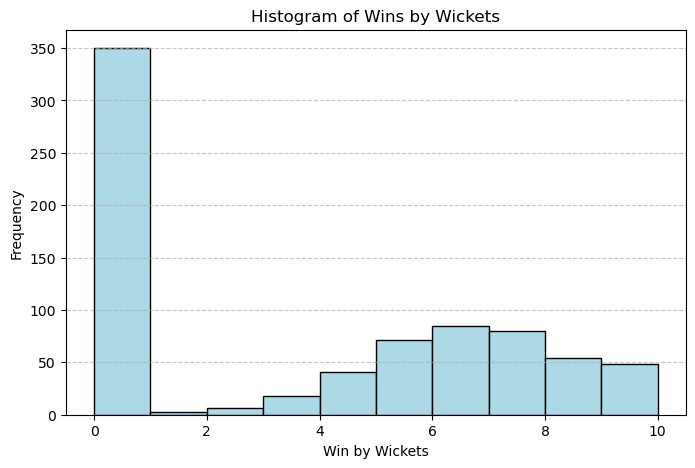

In [9]:
# --- Step 1: Calculate Mean and Standard Deviation ---
mean = df["win_by_wickets"].mean()
std = df["win_by_wickets"].std()

print(f"Mean of win_by_wickets: {mean:.2f}")
print(f"Standard Deviation of win_by_wickets: {std:.2f}")

# --- Step 2: Plot Histogram ---
plt.figure(figsize=(8,5))
plt.hist(df["win_by_wickets"], bins=10, color='lightblue', edgecolor='black')
plt.title("Histogram of Wins by Wickets")
plt.xlabel("Win by Wickets")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

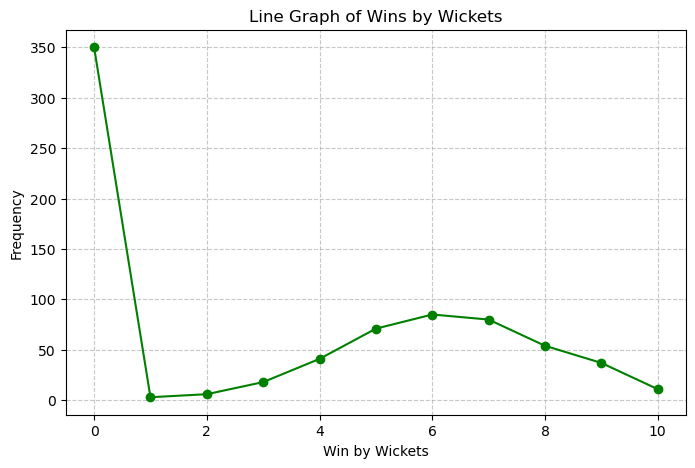

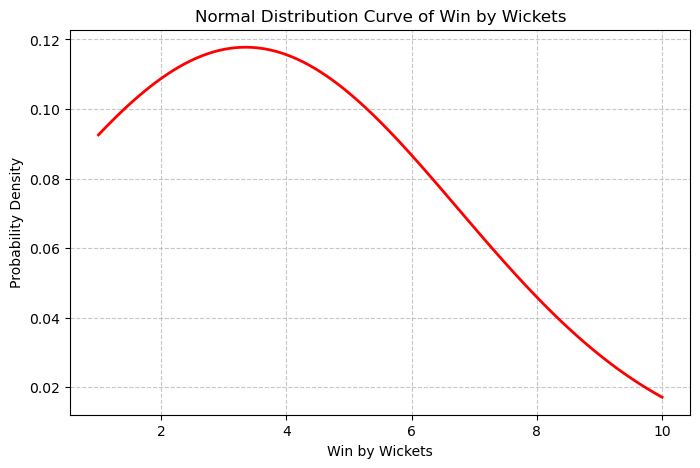

In [10]:
# --- Step 3: Plot Line Graph (Frequency curve) ---
freq = df["win_by_wickets"].value_counts().sort_index()
plt.figure(figsize=(8,5))
plt.plot(freq.index, freq.values, marker='o', color='green', linestyle='-')
plt.title("Line Graph of Wins by Wickets")
plt.xlabel("Win by Wickets")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# --- Step 4: Plot Normal Distribution Curve ---
x = np.linspace(1, 10, 100)
y = norm.pdf(x, mean, std)  # normal distribution formula

plt.figure(figsize=(8,5))
plt.plot(x, y, color='red', linewidth=2)
plt.title("Normal Distribution Curve of Win by Wickets")
plt.xlabel("Win by Wickets")
plt.ylabel("Probability Density")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# **7: Percentile using Z-Score**
### **Concept:**
#### Percentile tells you what percent of matches had a smaller winning margin than the given value.
### **Formula:**
#### **Percentile** =norm.cdf(Z)×100
### **Steps:**
#### Use **scipy.stats.norm.cdf(z)** to find the cumulative probability.
#### Multiply by 100 to convert to percentile.
### **Example:**
#### If percentile = 78%, it means 78% of matches had a smaller winning margin than 35 runs.

In [11]:
# --- Step 1: Mean and Standard Deviation ---
mean = df["win_by_runs"].mean()
std = df["win_by_runs"].std()

print(f"Mean of win_by_runs: {mean:.2f}")
print(f"Standard Deviation of win_by_runs: {std:.2f}")

# --- Step 2: Calculate z-score for 35 runs ---
X = 35
z = (X - mean) / std
print(f"Z-score for a team winning by {X} runs = {z:.2f}")

Mean of win_by_runs: 13.28
Standard Deviation of win_by_runs: 23.47
Z-score for a team winning by 35 runs = 0.93


In [12]:
# --- Step 3: Calculate percentile from z-score ---
percentile = norm.cdf(z) * 100
print(f"Percentile for a {X}-run win = {percentile:.2f}%")


Percentile for a 35-run win = 82.26%
